In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import some data
df = pd.read_csv("hotels_data.csv")
df.head()

,Unnamed: 0,SnapshotDate,CheckinDate,WeekDay,DayDiff,Hotel Name,Discount Code
0,0,20150717.0,20150812.0,2,26,70,1
1,1,20150717.0,20150819.0,2,33,70,1
2,2,20150717.0,20150813.0,3,27,964,1
3,3,20150717.0,20150726.0,6,9,254,1
4,4,20150717.0,20150812.0,2,26,254,1


In [3]:
X = df[['SnapshotDate','CheckinDate','DayDiff','WeekDay','Hotel Name']]
Y = df["Discount Code"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.45, random_state=100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.tree import DecisionTreeClassifier
"""
Train the model
"""
tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=4,random_state=3).fit(X_train ,y_train)

In [20]:
"""
Predict the classes of new, unseen data
"""
prediction = tree.predict(X_test)

In [21]:
"""
Check the accuracy
"""
print("The prediction accuracy is: ",tree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  34.28879004400701 %


In [22]:
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix 
results = []
names = []
results.append(metrics.accuracy_score(y_test,prediction))
names.append('tree')
cm = confusion_matrix(y_test, prediction)

In [23]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
FPR.sort()
print('FP:',FP)
print('FN:',FN)
print('TP:',TP)
print('TN:',TN)
print('TPR:',TPR)
print('FPR:',TPR)

FP: [ 2107 39901 13539     0]
FN: [16153  7159 17602 14633]
TP: [ 1419 19995  7571     0]
TN: [64853 17477 45820 69899]
TPR: [0.081 0.736 0.301 0.   ]
FPR: [0.081 0.736 0.301 0.   ]


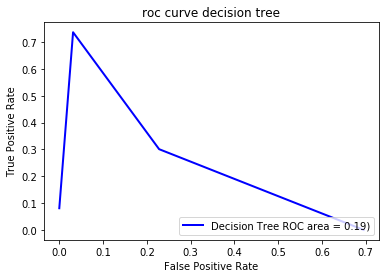

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#Get ROC curve
roc_auc = auc(FPR, TPR)
plt.figure()
plt.title('roc curve decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.plot(FPR, TPR, color='blue', lw=2, label='Decision Tree ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=44)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# summarize transformed data
np.set_printoptions(precision=3)

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None)

In [30]:
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.33
Accuracy of GNB classifier on test set: 0.34


In [31]:
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
results.append(metrics.accuracy_score(y_test,y_pred))
names.append('gnb')

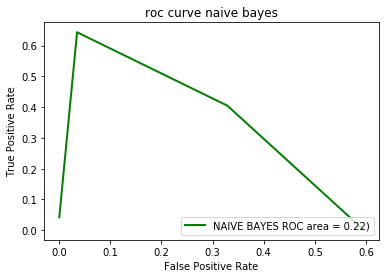

In [32]:
##Get Grafh ROC FP and TP for naive bayes
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
FPR.sort()
roc_auc = auc(FPR, TPR)
plt.figure()
plt.title('roc curve naive bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.plot(FPR, TPR, color='green', lw=2, label='NAIVE BAYES ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

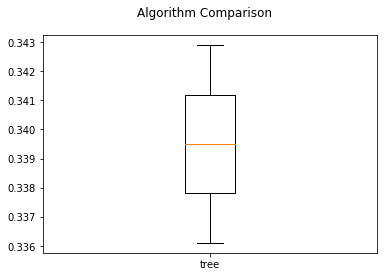

['tree', 'gnb']
[0.34288790044007006, 0.33610259719309565]


In [33]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
print(names)
print(results)